In [341]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [342]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

In [343]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

In [344]:
df_train.head()

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1


In [345]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


In [346]:
df_train.isnull().any().sum()

0

CLEAN

In [347]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Sample DataFrame initialization (make sure to replace this with your actual DataFrame)
# df_train = pd.DataFrame({'text': ['Sample text here', 'I love programming']})

# Convert text to lowercase
df_train["text"] = df_train["text"].str.lower()

# Removing English stopwords
stop_words = stopwords.words("english")
df_train["text"] = df_train["text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

# Define Tagalog stopwords
tagalog_stopwords = ["akin", "aking", "ako", "alin", "am", "amin", "aming", "ang", "ano", "anumang", "apat", "at", "atin",
                     "ating", "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din",
                     "dito", "doon", "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto",
                     "habang", "hanggang", "hindi", "huwag", "iba", "ibaba", "ibabaw", "ibig", "ikaw", "ilagay",
                     "ilalim", "ilan", "inyong", "isa", "isang", "itaas", "ito", "iyo", "iyon", "iyong", "ka",
                     "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya",
                     "kanyang", "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kaya", "kaysa", "ko",
                     "kong", "kulang", "kumuha", "kung", "laban", "lahat", "lamang", "likod", "lima", "maaari",
                     "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "masyado", "may",
                     "mayroon", "mga", "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging",
                     "nagkaroon", "nais", "nakita", "namin", "napaka", "narito", "nasaan", "ng", "ngayon", "ni",
                     "nila", "nilang", "nito", "niya", "niyang", "noon", "o", "pa", "paano", "pababa",
                     "paggawa", "pagitan", "pagkakaroon", "pagkatapos", "palabas", "pamamagitan", "panahon",
                     "pangalawa", "para", "paraan", "pareho", "pataas", "pero", "pumunta", "pumupunta", "sa",
                     "saan", "sabi", "sabihin", "sarili", "sila", "sino", "siya", "tatlo", "tayo", "tulad",
                     "tungkol", "una", "walang", "re"]

# Removing Tagalog stopwords
df_train["text"] = df_train["text"].apply(lambda x: " ".join(word for word in x.split() if word not in tagalog_stopwords))

# Removing links
df_train["text"] = df_train["text"].apply(lambda x: re.sub(r"http\S+|www\.\S+", "", x))

# Removing email addresses
df_train["text"] = df_train["text"].apply(lambda x: re.sub(r"\w+@\w+\.com", "", x))

# Removing punctuation marks
df_train["text"] = df_train["text"].apply(lambda x: re.sub(r"[.,;:!\?\"'`]", "", x))
df_train["text"] = df_train["text"].apply(lambda x: re.sub(r"[@#$%^&*\/\+-_=\{\}<>]", "", x))

# Now df_train["text"] is cleaned and processed


In [348]:
df_train.head()

,text,label
0,presidential candidate mar roxas implies govt ...,1
1,parang mali sumunod patalastas nescaf coffee b...,1
2,bet ko pula kulay posas,1
3,username kakampink,0
4,parang tahimik pink doc willie ong reaction paper,1


In [349]:
wnl = WordNetLemmatizer()
df_train["text"] = df_train["text"].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))

df_train[["text"]].head()

,text
0,presidential candidate mar roxas imply govt li...
1,parang mali sumunod patalastas nescaf coffee b...
2,bet ko pula kulay posas
3,username kakampink
4,parang tahimik pink doc willie ong reaction paper


In [350]:
# X AND Y
y = df_train["label"].values
x = df_train["text"].values

In [351]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the test dataset
#dataset = load_dataset("mapsoriano/2016_2022_hate_speech_filipino")
#df_test = pd.DataFrame(dataset['test'])
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

# Preprocess the test data (to apply the same preprocessing as for the training data)
# Convert text to lowercase
df_test["text"] = df_test["text"].str.lower()

# Removing English stopwords
stop_words = stopwords.words("english")
df_test["text"] = df_test["text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

# Define Tagalog stopwords
tagalog_stopwords = ["akin", "aking", "ako", "alin", "am", "amin", "aming", "ang", "ano", "anumang", "apat", "at", "atin",
                     "ating", "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din",
                     "dito", "doon", "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto",
                     "habang", "hanggang", "hindi", "huwag", "iba", "ibaba", "ibabaw", "ibig", "ikaw", "ilagay",
                     "ilalim", "ilan", "inyong", "isa", "isang", "itaas", "ito", "iyo", "iyon", "iyong", "ka",
                     "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya",
                     "kanyang", "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kaya", "kaysa", "ko",
                     "kong", "kulang", "kumuha", "kung", "laban", "lahat", "lamang", "likod", "lima", "maaari",
                     "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "masyado", "may",
                     "mayroon", "mga", "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging",
                     "nagkaroon", "nais", "nakita", "namin", "napaka", "narito", "nasaan", "ng", "ngayon", "ni",
                     "nila", "nilang", "nito", "niya", "niyang", "noon", "o", "pa", "paano", "pababa",
                     "paggawa", "pagitan", "pagkakaroon", "pagkatapos", "palabas", "pamamagitan", "panahon",
                     "pangalawa", "para", "paraan", "pareho", "pataas", "pero", "pumunta", "pumupunta", "sa",
                     "saan", "sabi", "sabihin", "sarili", "sila", "sino", "siya", "tatlo", "tayo", "tulad",
                     "tungkol", "una", "walang", "re"]

# Removing Tagalog stopwords
df_test["text"] = df_test["text"].apply(lambda x: " ".join(word for word in x.split() if word not in tagalog_stopwords))

# Removing links
df_test["text"] = df_test["text"].apply(lambda x: re.sub(r"http\S+|www\.\S+", "", x))

# Removing email addresses
df_test["text"] = df_test["text"].apply(lambda x: re.sub(r"\w+@\w+\.com", "", x))

# Removing punctuation marks
df_test["text"] = df_test["text"].apply(lambda x: re.sub(r"[.,;:!\?\"'`]", "", x))
df_test["text"] = df_test["text"].apply(lambda x: re.sub(r"[@#$%^&*\/\+-_=\{\}<>]", "", x))

df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])


In [352]:
# Create the TF-IDF vectorizer
vect = TfidfVectorizer(stop_words='english',max_df=0.5)

# Fit the vectorizer on the training data and transform the training data
X_train_transformed = vect.fit_transform(x)

# Transform the test data using the fitted vectorizer
X_test = df_test['text'].values
X_test_transformed = vect.transform(X_test)

In [353]:


# .predict ay test and validation na vectorized
# fit model to training that is vectorized

In [354]:
# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

y_train = y

#fitting the model into train data
nb.fit(X_train_transformed, y_train)

#predicting the model on test n validation data
y_pred_test = nb.predict(X_test_transformed)
y_pred_validation = nb.predict(X_train_transformed)

In [355]:
#checking accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test)*100)

#Making Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
print(cm)

83.02491103202847
[[1107  305]
 [ 172 1226]]


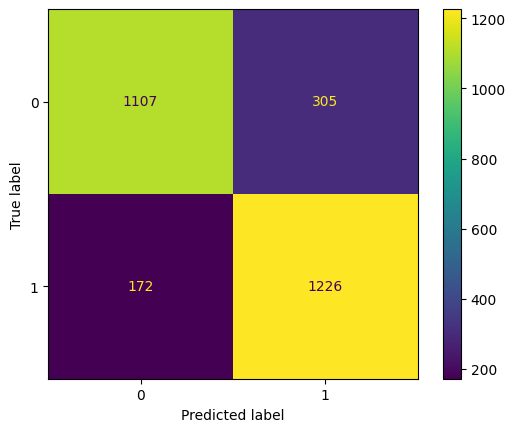

In [356]:

#Plot the confusion matrix.
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

In [357]:
#df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

In [358]:
new_text = pd.Series(" Hello, how are you?")
new_text_transform = vect.transform(new_text)
print(" The email is a" ,nb.predict(new_text_transform))

 The email is a [0]


In [359]:
new_text = pd.Series(" Hello, how are you as bilang?")
new_text_transform = vect.transform(new_text)
print(" The email is a" ,nb.predict(new_text_transform))

 The email is a [1]
